# 4 Training and Modeling Data<a id='4_Training_and_Modeling_Data'></a>

## Contents <a id ="Content" > </a>

* [Introduction](#Introduction)
* [Imports](#Imports)
* [Train Test Split](#Train_Test_Split) 
* [Training and Modeling](#Training_and_Modeling)
    * [Model Selection](#Model_Selection)
    * [Evaluation Metrics](#Evaluation-Metrics)
        * [Training and Modeling](#Train_and_Model)
        * [Hyperparameter Tuning and Model Training](#Hyperparameter_Tuning_Training)
            * [Logistic Regression](#Logistic_Regression)
            * [Evaluation](#Evaluation)
* [Additional Models](#AdditionalModels)
* [Summary](#Summary)
* [Recommendations](#Recom)

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import pipeline
from sklearn import model_selection
from sklearn import linear_model

#from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# remove warning
#import warnings
#warnings.filterwarnings("ignore")


In [2]:
#evaluation = pd.DataFrame(index=[],columns =[])
#metrics_comparison = pd.DataFrame(index=[],columns =[])

#### Data Reading

In [3]:
#Read the data
X_train = pd.read_csv("../data/4.X_train.csv")
y_train = pd.read_csv("../data/4.y_train.csv")
X_test = pd.read_csv("../data/4.X_test.csv")
y_test = pd.read_csv("../data/4.y_test.csv")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [4]:
X_train.shape,y_train.shape

((7088, 16), (7088,))

In [5]:
X_test.shape,y_test.shape

((3039, 16), (3039,))

In [6]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7088.0,-3.448458e-16,1.000071,-2.531322,-0.661337,-0.038008,0.709986,3.327966
Credit_Limit,7088.0,8.597793e+00,0.930669,7.271217,7.841395,8.418587,9.298671,10.449178
Total_Revolving_Bal,7088.0,9.103482e-01,0.638103,0.000000,0.248822,1.000000,1.396112,1.977219
Total_Trans_Amt,7088.0,8.167921e+00,0.656979,6.390241,7.674617,8.267449,8.468633,9.824661
Avg_Utilization_Ratio,7088.0,2.753070e-01,0.276635,0.000000,0.023000,0.175000,0.502000,0.999000
Gender_Encoded,7088.0,5.328725e-01,0.498953,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,7088.0,2.344949e+00,1.299597,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,7088.0,2.839306e+00,1.215114,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,7088.0,2.175226e+00,1.334986,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,7088.0,1.081546e+00,0.330233,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,3039.0,2.431604e-16,1.000165,-2.545475,-0.671517,-0.046864,0.702719,2.701607
Credit_Limit,3039.0,8.616519e+00,0.940983,7.271217,7.854381,8.432724,9.328701,10.449178
Total_Revolving_Bal,3039.0,9.134881e-01,0.640117,0.000000,0.349961,1.000000,1.401403,1.961808
Total_Trans_Amt,3039.0,8.157574e+00,0.648578,6.234411,7.682021,8.271293,8.453401,9.797849
Avg_Utilization_Ratio,3039.0,2.739293e-01,0.273522,0.000000,0.022500,0.177000,0.503500,0.994000
Gender_Encoded,3039.0,5.202369e-01,0.499673,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,3039.0,2.349128e+00,1.297511,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,3039.0,2.851925e+00,1.201185,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,3039.0,2.199079e+00,1.332057,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,3039.0,1.088516e+00,0.341929,1.000000,1.000000,1.000000,1.000000,4.000000


#### **Scaling**
**MinMax Scaling**:  The Min-Max Scaler is a data normalization technique used to transform features so that they fit within a specific range, usually [0, 1]. This helps machine learning models train more effectively and obtain more generalized values for coefficients and intercepts.
Equation :  Xsc=X−Xmin/Xmax−Xmin where x is the datapoint. mi nand max are respective minimum and maximum values of corresponding datapoint

Since the outliers are capped, minmax scaling would be good form of scaling data,as nothing to cap by min max scalar.

In [8]:
# Apply MinMaxScaler to train and test data
from sklearn.preprocessing import MinMaxScaler

# Apply StandardScaler on train data (fit and transform)
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False) # range is 0 to 1.
X_train = scaler.fit_transform(X_train)

# Apply the scaler on test data (transform only)
X_test = scaler.transform(X_test)

Let's start off with the simplest model - Logistic Regression

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve,precision_recall_curve,classification_report,confusion_matrix

In [10]:
# Calculate scores and report matrics
# create list to store scores to display in tabular form and is used at the end of the model
precision_recall_test = []
precision_recall_train = []

def Calculate_scores(model_name,y_test_df,y_pred_df,test = True):

    # Calculate Precision, Recall, and F1 Score, average=none is used to get both class scores
    precision = precision_score(y_test_df, y_pred_df,average=None)
    recall = recall_score(y_test_df, y_pred_df,average=None)
    f1 = f1_score(y_test_df, y_pred_df,average=None)
    #accuracy = accuracy_score(y_test,y_pred)

    # storing precision, reall, f1 score into list
    if test:
        precision_recall_test.append({
        'Model': model_name,
        'Precision_test': precision.round(2),
        'Recall_test': recall.round(2),
        'f1_test': f1.round(2)
        #'Accuracy': accuracy
        })
    else:
        precision_recall_train.append({
        'Model': model_name,
        'Precision_train': precision.round(2),
        'Recall_train': recall.round(2),
        'f1_train': f1.round(2)
        #'Accuracy': accuracy
        })


    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = roc_auc_score(y_test_df, y_pred_df)

    # Get confusion matrix and classification  report
    #conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test_df,y_pred_df)

    #print(f"\nConfusion matrix\n {conf_matrix}")
    print(f"\nClassification Report\n {class_report}")

In [11]:
# Confusion Matrix,Precision-Recall Curve, ROC Curve
def Plot_Reports(estimator,X_test_df,y_test_df,y_pred_df):
    y_pred_df = y_pred_df.astype(int)  # Ensure y_pred is integers

    # Convert y_test to integers if they are strings (in case this is needed)
    y_test_df = y_test_df.astype(int)
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a figure with a larger size for better readability
    plt.figure(figsize=(12, 4))

    # 1. Confusion Matrix Heatmap
    plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
    cm = confusion_matrix(y_test_df, y_pred_df)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels = ["Staying","Attrited"],yticklabels = ["Staying","Attrited"])
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # 2. Precision-Recall Curve
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
    precision, recall, _ = precision_recall_curve(y_test_df, estimator.predict_proba(X_test_df)[:, 1])
    plt.plot(recall, precision, marker='o', color='teal',label=str(estimator))
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

    # 3. ROC Curve
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
    fpr, tpr, _ = roc_curve(y_test_df, estimator.predict_proba(X_test_df)[:, 1])
    roc_auc = roc_auc_score(y_test_df, y_pred_df)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='orange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

## Training and Modeling <a id=Training_and_Modeling ></a>

### Model Selection 

Four competing supervised classfication models/algorithms are considered, namely, 
* Logistic Regression classification
* Random Forest classifier
* K Nearest Neighbours classification
* XGBoost classifier 

### Evaluation Metrics

Thinking of customers will not exit but he does, this means income loss for the Bank. Banks need to take action steps for this scenario. This is true +ve, and is "recall". Banks are looking for recall to be maximized, greater the recall lesser the chances of false negative means lesser chances of predicting customers will not exit where in reality they do. Since classes in the data are unbalanced, I can make use of the confusion matrix to examine the outcome of the model. Recall and precision metrics can be calculated from the confusion matrix, and this would help me assess the models.
This project aims to predict potential churn customers, and it is realized that the client cost of mistakenly classifying non-churn customers as churn may be high in practice because banks would not want to lose valuable customers, and the banks would like to identify churners at their best efforts as well. Thus, it would be useful to consider Recall. To complement this Receiver Operating Characteristic curve (ROC) is used. ROC is a plot of True Positive Rate (TPR) against False Positive Rate (FPR). This means I can consider TPR and FPR simultaneously, by making use of the area under the curve (AUC) of ROC.

TPR or Recall or Sensitivity tells us what proportion of the positive class got correctly classified. TPR = TP/(TP+FN)

FPR tells us what proportion of the negative class got incorrectly classified by the classifier. FPR = FP/(TN+FP)

All models are used to predict the actual class of the data point by predicting its probability of belonging to different classes. This gives us more control over the result.And ROC_AUC threshold is used to interpret the result of the classifier.


## Training and Modeling

### Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for binary classification problems. Unlike linear regression, it predicts the probability of a class and maps the output to either 0 or 1 using a sigmoid function.By default, it uses threshold 0.5,  if the probability is greater than 0.5, classify as 1; otherwise, classify as 0.

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      5949
           1       0.38      0.75      0.50      1139

    accuracy                           0.76      7088
   macro avg       0.66      0.76      0.67      7088
weighted avg       0.85      0.76      0.79      7088

[[4541 1408]
 [ 285  854]]


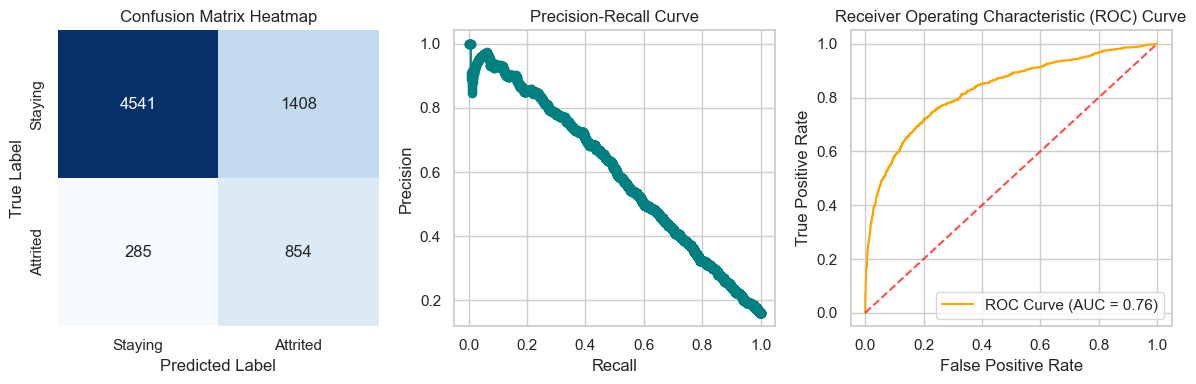

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      2551
           1       0.38      0.74      0.50       488

    accuracy                           0.77      3039
   macro avg       0.66      0.76      0.68      3039
weighted avg       0.85      0.77      0.79      3039

[[1972  579]
 [ 128  360]]


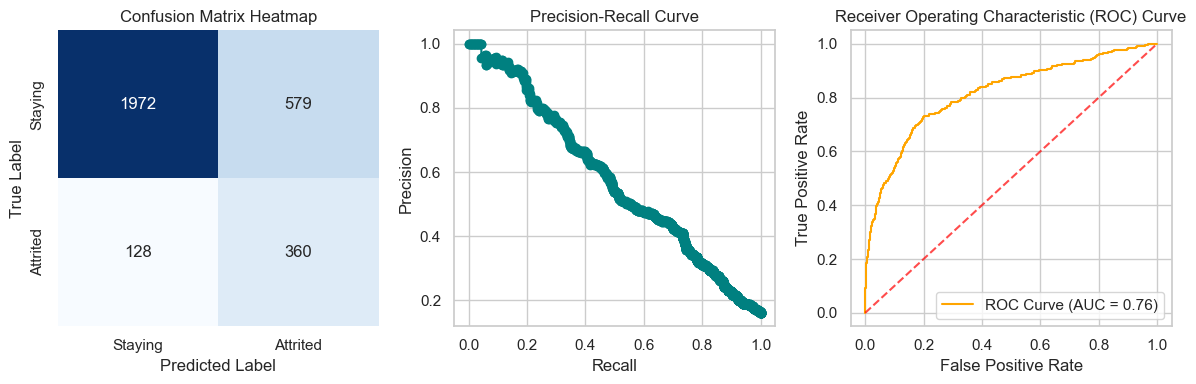

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"


In [12]:
logistic_model = linear_model.LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
logistic_model.fit(X_train, y_train)


#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = logistic_model.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegression',y_train,y_trainpred_lg,False)
print(confusion_matrix(y_train,y_trainpred_lg))
#Plot Reports
Plot_Reports(logistic_model,X_train,y_train,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = logistic_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegression',y_test,y_testpred_lg,True)
print(confusion_matrix(y_test,y_testpred_lg))
#Plot Reports
Plot_Reports(logistic_model,X_test,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

#### Logistic Regression with Optimal Threshold

By default, Logistic Regression uses a threshold of 0.5 to classify observations into 0 or 1. Since the dataset is found to be imbalanced,using 0.5 threshold might miss important cases.so adjust threshhold to balance recall & precision.By using precision_recall_curve optimal threshold shall be found, and used for actual prediction.

Optimal Threshold for train: 0.6640
*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      5949
           1       0.54      0.58      0.56      1139

    accuracy                           0.85      7088
   macro avg       0.73      0.74      0.73      7088
weighted avg       0.86      0.85      0.85      7088



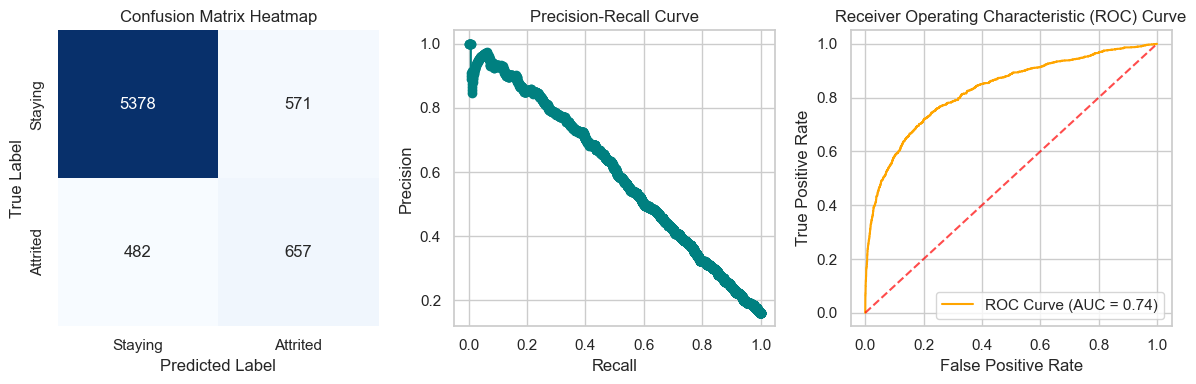

Optimal Threshold for train: 0.5642
*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      2551
           1       0.45      0.68      0.54       488

    accuracy                           0.81      3039
   macro avg       0.69      0.76      0.71      3039
weighted avg       0.85      0.81      0.83      3039



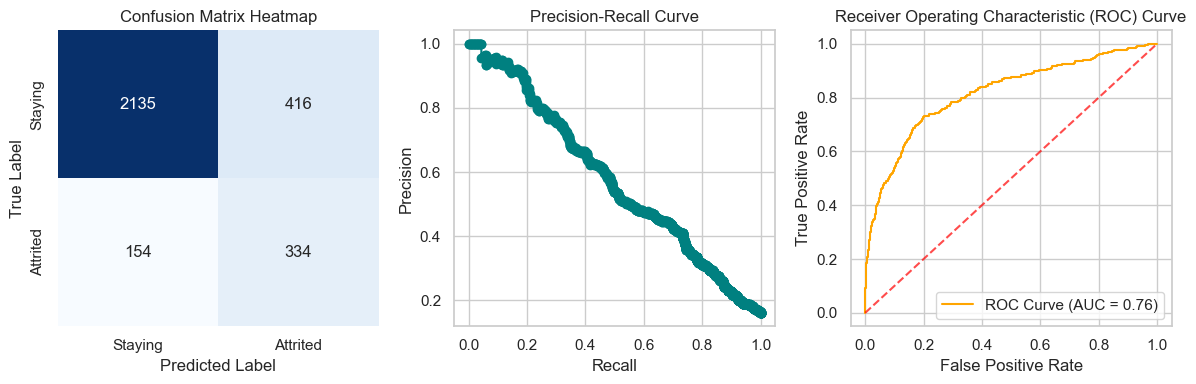

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"


In [13]:
# Logistic Regression model
logistic_model = linear_model.LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Predict probabilities for the train set (to calculate AUC and ROC curve)
y_train_proba = logistic_model.predict_proba(X_train)[:, 1]

#Calculate precision, recall, and thresholds from precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)

#Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#Find the threshold that maximizes the F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for train: {optimal_threshold:.4f}")

# Make predictions using the optimal threshold
y_trainPred_lgOptimal = (y_train_proba >= optimal_threshold).astype(int)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegThreshold',y_train,y_trainPred_lgOptimal,False)

#Plot
Plot_Reports(logistic_model,X_train,y_train,y_trainPred_lgOptimal)

#--------------------------------------------------------------
# Predict probabilities for the test set (to calculate AUC and ROC curve)
y_test_proba = logistic_model.predict_proba(X_test)[:, 1]

#Calculate precision, recall, and thresholds from precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

#Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

#Find the threshold that maximizes the F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for train: {optimal_threshold:.4f}")

# Make predictions using the optimal threshold
y_testPred_lgOptimal = (y_test_proba >= optimal_threshold).astype(int)
#---------------------------------------------
print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegThreshold',y_test,y_testPred_lgOptimal,True)

#Plot
Plot_Reports(logistic_model,X_test,y_test,y_testPred_lgOptimal)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

 #### Logistic Regression with SMOTE
 
 SMOTE is a technique that generates synthetic samples for the minority class to balance the class distribution.

 One way to solve imbalance dataset is either do oversampling of the minority class or under sampling by reducing the majority class. Here over sampling shall be tried using 'SMOTE' technique.The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples is synthesized from the existing examples.

In [14]:
from imblearn.over_sampling import SMOTE
print(f"Before SMOTE y_train==1 (Defaulter): {sum(y_train==1)}")
print(f"Before SMOTE y_train==0(Fully Paid): {sum(y_train==0)} \n")

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE y_train==1 (Defaulter): {sum(y_train_smote==1)}")
print(f"After SMOTE y_train==0 (Fully Paid): {sum(y_train_smote==0)} \n")

print(f'After SMOTE, the shape of train_X: {X_train_smote.shape}')
print(f'After SMOTE, the shape of train_y: {y_train_smote.shape} \n')


Before SMOTE y_train==1 (Defaulter): 1139
Before SMOTE y_train==0(Fully Paid): 5949 

After SMOTE y_train==1 (Defaulter): 5949
After SMOTE y_train==0 (Fully Paid): 5949 

After SMOTE, the shape of train_X: (11898, 16)
After SMOTE, the shape of train_y: (11898,) 



*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      5949
           1       0.77      0.76      0.76      5949

    accuracy                           0.77     11898
   macro avg       0.77      0.77      0.77     11898
weighted avg       0.77      0.77      0.77     11898



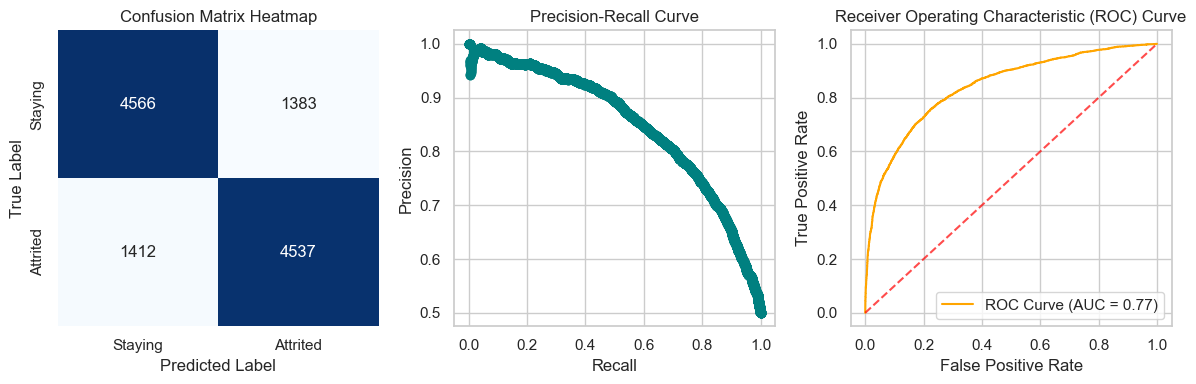

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      2551
           1       0.38      0.73      0.50       488

    accuracy                           0.77      3039
   macro avg       0.66      0.75      0.68      3039
weighted avg       0.85      0.77      0.79      3039



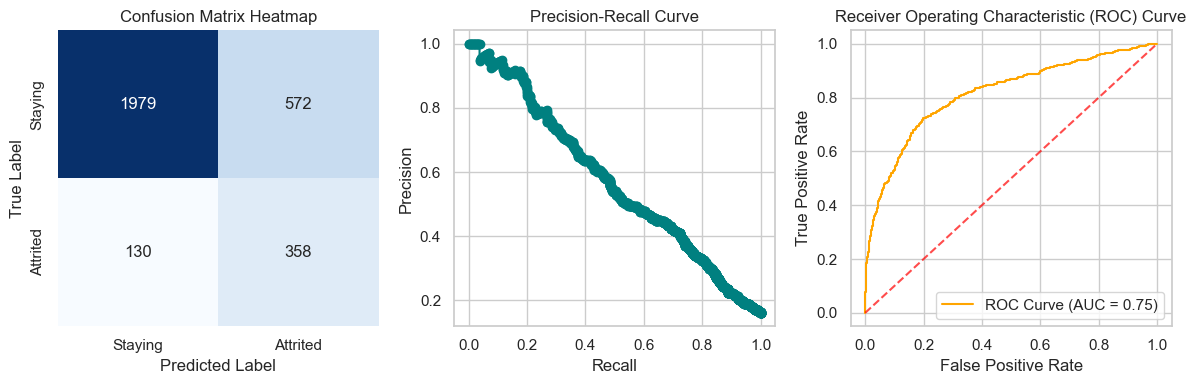

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"


In [15]:
logistic_model = linear_model.LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
logistic_model.fit(X_train_smote, y_train_smote)

#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = logistic_model.predict(X_train_smote)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionSMOTE',y_train_smote,y_trainpred_lg,False)

#Plot Reports
Plot_Reports(logistic_model,X_train_smote,y_train_smote,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = logistic_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionSMOTE',y_test,y_testpred_lg,True)

#Plot Reports
Plot_Reports(logistic_model,X_test,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

#### Apply PCA
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional form, making it easier to visualize, process, or analyze, while retaining as much variability (information) in the data as possible.

[0.29967858 0.24014542 0.09810964 0.07002203 0.05164024 0.04751823
 0.03930012 0.03596205 0.02388215 0.02300965 0.02050079 0.0186003
 0.01822026 0.00764709 0.00576344 0.        ]
[0.29967858 0.539824   0.63793364 0.70795567 0.75959591 0.80711414
 0.84641427 0.88237631 0.90625846 0.92926811 0.9497689  0.9683692
 0.98658946 0.99423656 1.         1.        ]


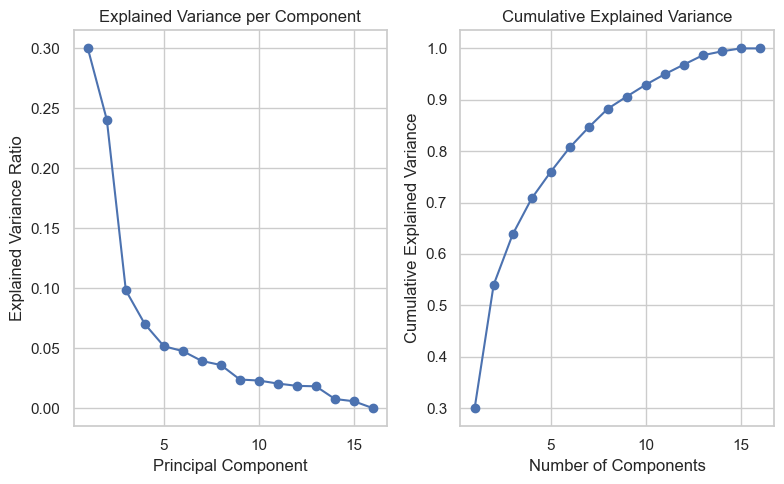

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
X_PCA= pca.fit(X_train)  # Standardized data

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

# Plot Explained Variance Ratio
plt.figure(figsize=(8, 5))
# Plot individual explained variances
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

Best component is 9, the expalined variance 90%

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.74      0.83      5949
           1       0.35      0.73      0.48      1139

    accuracy                           0.74      7088
   macro avg       0.64      0.74      0.65      7088
weighted avg       0.84      0.74      0.77      7088

[[4430 1519]
 [ 311  828]]


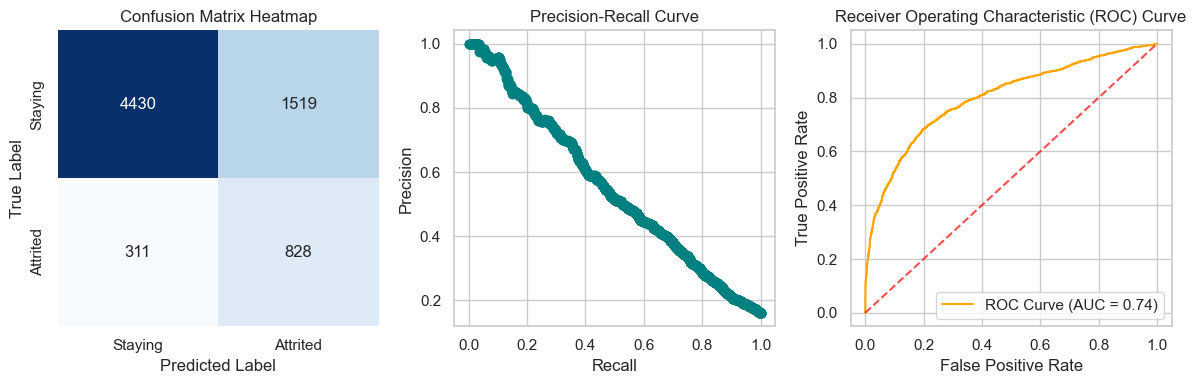

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      2551
           1       0.35      0.73      0.48       488

    accuracy                           0.74      3039
   macro avg       0.64      0.74      0.65      3039
weighted avg       0.84      0.74      0.77      3039

[[1904  647]
 [ 134  354]]


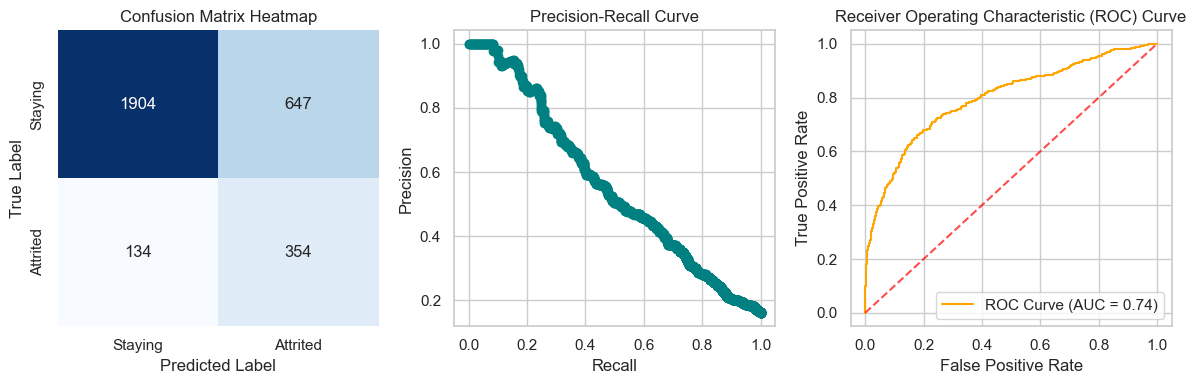

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"


In [17]:

# Apply PCA (Reduce to 12 components for visualization or 3 for better model)
pca = PCA(n_components=9)  # You can change this based on your dataset's complexity
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression
log_reg = linear_model.LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced')
log_reg.fit(X_train_pca, y_train)
#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = log_reg.predict(X_train_pca)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionPCA',y_train,y_trainpred_lg,False)
print(confusion_matrix(y_train,y_trainpred_lg))
#Plot Reports
Plot_Reports(log_reg,X_train_pca,y_train,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = log_reg.predict(X_test_pca)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('LogisticRegressionPCA',y_test,y_testpred_lg,True)
print(confusion_matrix(y_test,y_testpred_lg))
#Plot Reports
Plot_Reports(log_reg,X_test_pca,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

### Random Forest Model with Balanced class weight
Random Forest is a powerful ensemble learning method that builds multiple decision trees and combines their predictions.
When using imbalanced datasets, models tend to favor the majority class, leading to poor recall and precision for the minority class.That is seen with Logistic regression. Since dataset is highly imbalanced, to address this we shall use class_weight='balanced' in settings.This automatically adjusts the weight of each class based on its frequency.

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      0.99      0.99      1139

    accuracy                           1.00      7088
   macro avg       1.00      0.99      1.00      7088
weighted avg       1.00      1.00      1.00      7088



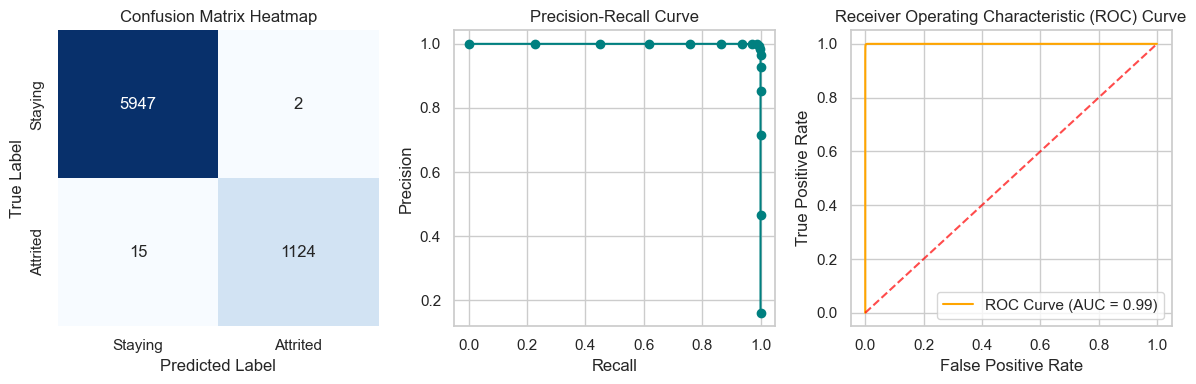

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2551
           1       0.86      0.64      0.74       488

    accuracy                           0.93      3039
   macro avg       0.90      0.81      0.85      3039
weighted avg       0.92      0.93      0.92      3039



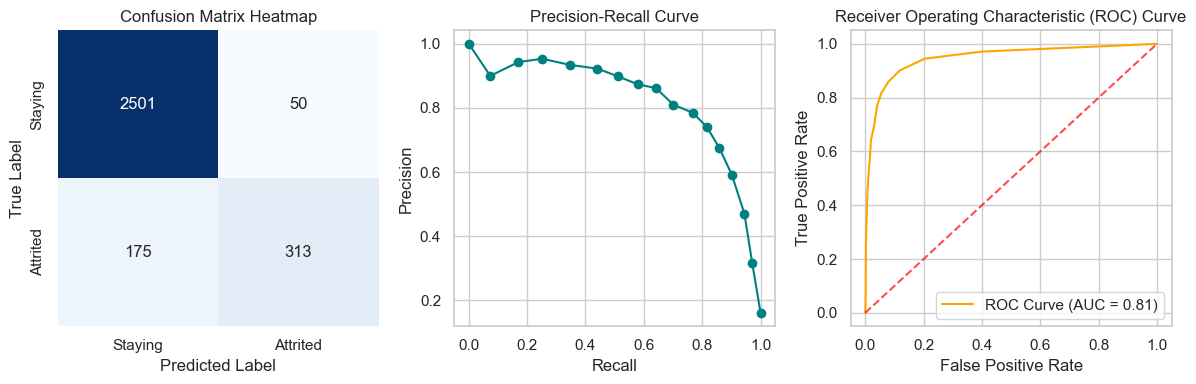

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"
4,RandomForest,"[0.93, 0.86]","[0.98, 0.64]","[0.96, 0.74]","[1.0, 1.0]","[1.0, 0.99]","[1.0, 0.99]"


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model with n_estimators=10
rf_model = RandomForestClassifier(n_estimators=15, random_state=1234, class_weight='balanced')
rf_model.fit(X_train, y_train)

#---------------------------------------------
# Make predictions on the training set
y_pred_rf_train = rf_model.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report for train dataset
Calculate_scores('RandomForest',y_train,y_pred_rf_train,False)

#Plot for train dataset
Plot_Reports(rf_model,X_train,y_train,y_pred_rf_train)
#---------------------------------------------
# Make predictions on the test set
y_pred_rf_test = rf_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report for test dataset
Calculate_scores('RandomForest',y_test,y_pred_rf_test,True)

#Plot for test dataset
Plot_Reports(rf_model,X_test,y_test,y_pred_rf_test)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

### Random Forest Model with Gridsearch

This implementation includes hyperparameter tuning using GridSearchCV while ensuring class imbalance handling with class_weight='balanced'.GridSearchCV is a technique used for hyperparameter optimization, where all possible combinations of hyperparameters within a specified grid is tried to find the optimal set of hyperparameters for a model to improve performance.

Parameter Grid defines a dictionary containing the hyperparameters and their possible values.

Cross-Validation - GridSearchCV evaluates all combinations of the parameters through cross-validation (e.g., 5-fold, 10-fold).
class_weight used is 'balanced' in setting.
**param_grid:**

```
'n_estimators': [100,200],          
'max_depth': [10,20,30],        
'min_samples_split': [2,5,10]
```

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5949
           1       0.91      0.99      0.95      1139

    accuracy                           0.98      7088
   macro avg       0.95      0.99      0.97      7088
weighted avg       0.98      0.98      0.98      7088



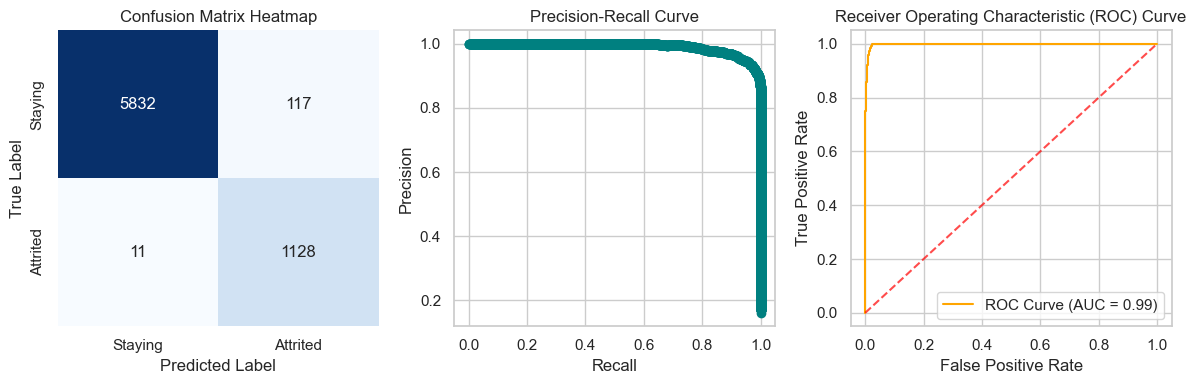

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2551
           1       0.80      0.74      0.77       488

    accuracy                           0.93      3039
   macro avg       0.87      0.85      0.86      3039
weighted avg       0.93      0.93      0.93      3039



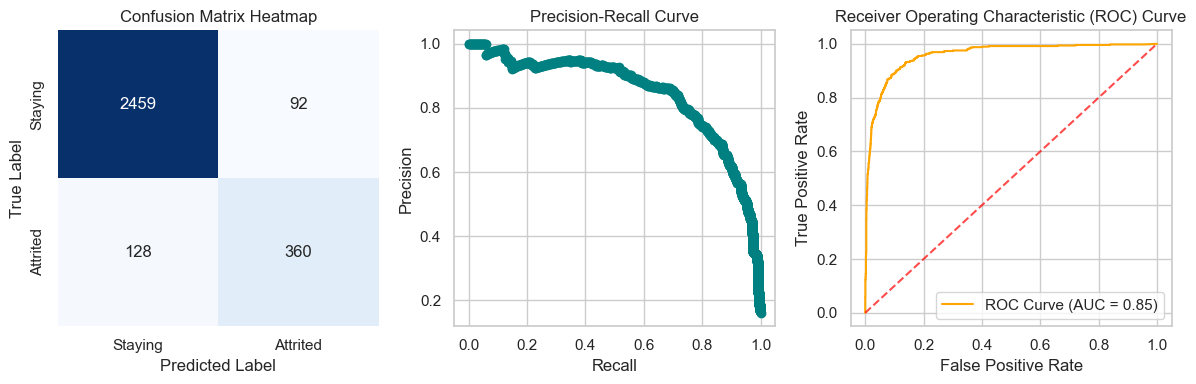

CPU times: total: 2.34 s
Wall time: 12.4 s


,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"
4,RandomForest,"[0.93, 0.86]","[0.98, 0.64]","[0.96, 0.74]","[1.0, 1.0]","[1.0, 0.99]","[1.0, 0.99]"
5,RandomForestGS,"[0.95, 0.8]","[0.96, 0.74]","[0.96, 0.77]","[1.0, 0.91]","[0.98, 0.99]","[0.99, 0.95]"


In [19]:
%%time


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],          # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1234, class_weight='balanced')

# Set up GridSearchCV
grid_search = model_selection.GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

#-----------------------------------------------------------
# Make predictions on the test set using the best model
y_trainPred_rf_best = best_rf_model.predict(X_train)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report for test dataset
Calculate_scores('RandomForestGS',y_train,y_trainPred_rf_best,False)

#Plot for test dataset
Plot_Reports(best_rf_model,X_train,y_train,y_trainPred_rf_best)
#-----------------------------------------------------------

# Make predictions on the test set using the best model
y_testPred_rf_best = best_rf_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")

#Calculate Scores and Classification Report for test dataset
Calculate_scores('RandomForestGS',y_test,y_testPred_rf_best,True)

#Plot for test dataset
Plot_Reports(best_rf_model,X_test,y_test,y_testPred_rf_best)
#-----------------------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

### XGBoost model
XGBoost (Extreme Gradient Boosting) is a highly efficient and powerful machine learning algorithm based on gradient boosting. It is known for its performance, scalability, and ability to handle both classification and regression tasks. This also has the built-in methods to calculate and visualize feature importance.

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       0.99      0.99      0.99      1139

    accuracy                           1.00      7088
   macro avg       1.00      0.99      0.99      7088
weighted avg       1.00      1.00      1.00      7088



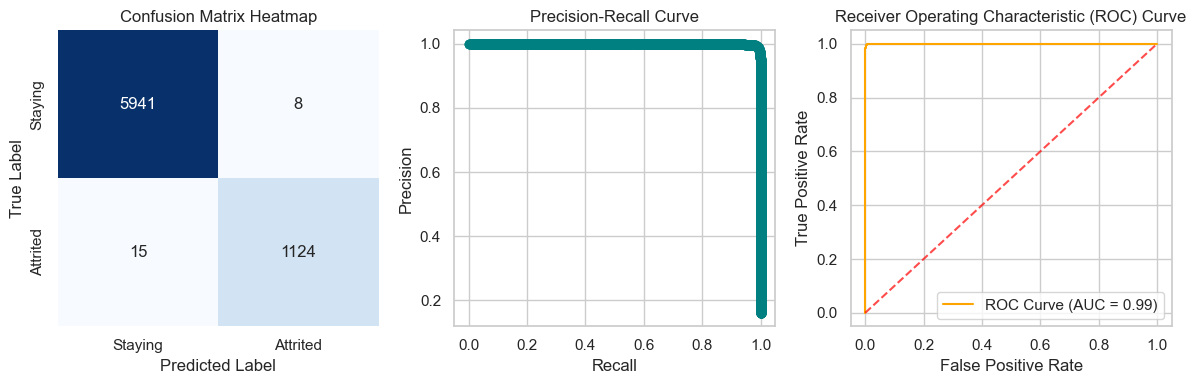

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2551
           1       0.85      0.77      0.81       488

    accuracy                           0.94      3039
   macro avg       0.90      0.87      0.89      3039
weighted avg       0.94      0.94      0.94      3039



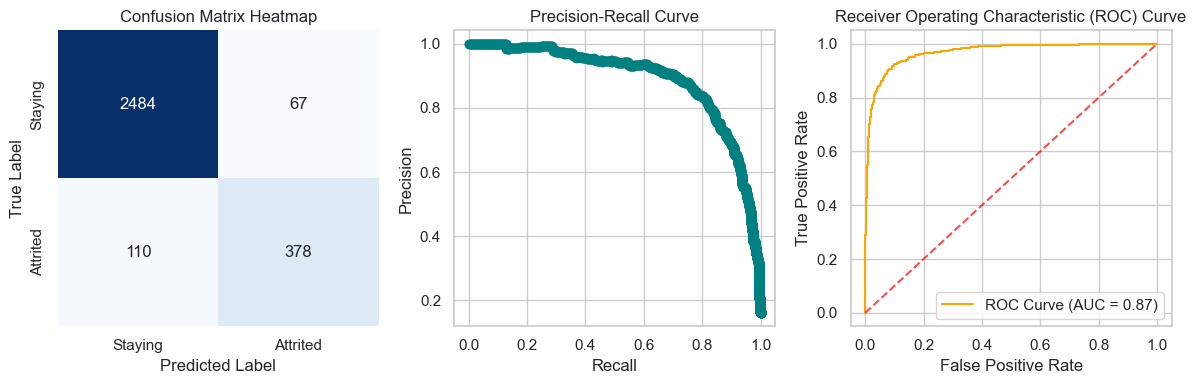

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"
4,RandomForest,"[0.93, 0.86]","[0.98, 0.64]","[0.96, 0.74]","[1.0, 1.0]","[1.0, 0.99]","[1.0, 0.99]"
5,RandomForestGS,"[0.95, 0.8]","[0.96, 0.74]","[0.96, 0.77]","[1.0, 0.91]","[0.98, 0.99]","[0.99, 0.95]"
6,XGBoost,"[0.96, 0.85]","[0.97, 0.77]","[0.97, 0.81]","[1.0, 0.99]","[1.0, 0.99]","[1.0, 0.99]"


In [20]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234)

# Train the model
xgb_model.fit(X_train, y_train)
#--------------------------------------------
# Make predictions on the training set
y_pred_xgb_train = xgb_model.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report for train dataset
Calculate_scores('XGBoost',y_train,y_pred_xgb_train,False)

#Plot for train dataset
Plot_Reports(xgb_model,X_train,y_train,y_pred_xgb_train)

#--------------------------------------------
# Make predictions on the test set
y_pred_xgb_test = xgb_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report for test dataset
Calculate_scores('XGBoost',y_test,y_pred_xgb_test,True)

#Plot for test dataset
Plot_Reports(xgb_model,X_test,y_test,y_pred_xgb_test)
#--------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

### XGBoost model with hyper parameter tuning

Hyperparameter tuning allows to optimize the parameters of the XGBoost model for better performance. In this process RandomizedSearchCV shall be used to find the best combination of hyperparameters for the model.

RandomizedSearchCV is a method for hyperparameter tuning that randomly samples a subset of hyperparameters from a larger search space and evaluates the performance of the model using cross-validation.

eval_metric='logloss' paramete is used to specify the evaluation metric during training, as it is binary classification problem.Log Loss heavily penalizes incorrect predictions where the model is very confident and measures the performance with probability value between 0 and 1.

**Hyperparameter grid:**

    - 'n_estimators': [50, 100, 200, 300],                 
    - 'learning_rate': [0.01, 0.1, 0.2, 0.3],              
    - 'max_depth': [None, 3, 5, 7, 10],                          
    - 'min_child_weight': [1, 3, 5],                      
    - 'subsample': [0.2, 0.6, 0.8, 1.0],                        
    - 'colsample_bytree': [0.6, 0.8, 1.0],                 
    - 'gamma': [0, 0.1, 0.3, 0.5]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5949
           1       0.90      1.00      0.95      1139

    accuracy                           0.98      7088
   macro avg       0.95      0.99      0.97      7088
weighted avg       0.98      0.98      0.98      7088



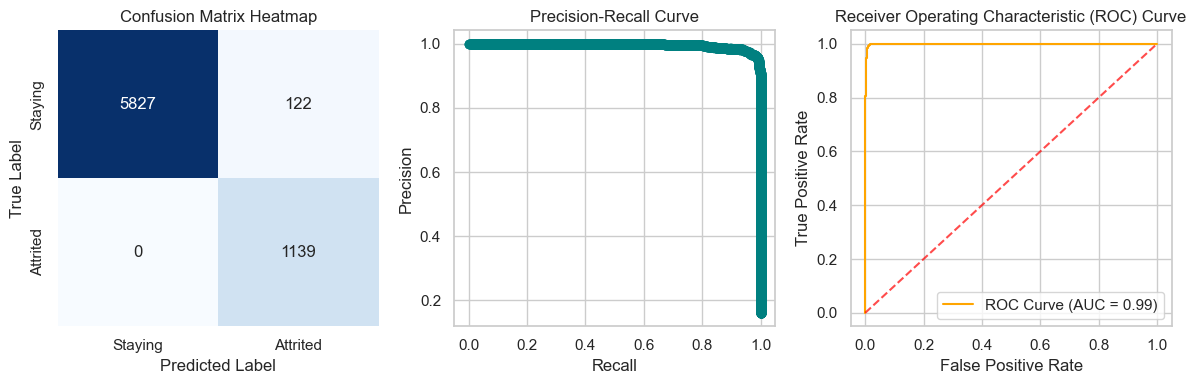

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2551
           1       0.78      0.83      0.80       488

    accuracy                           0.93      3039
   macro avg       0.87      0.89      0.88      3039
weighted avg       0.94      0.93      0.94      3039



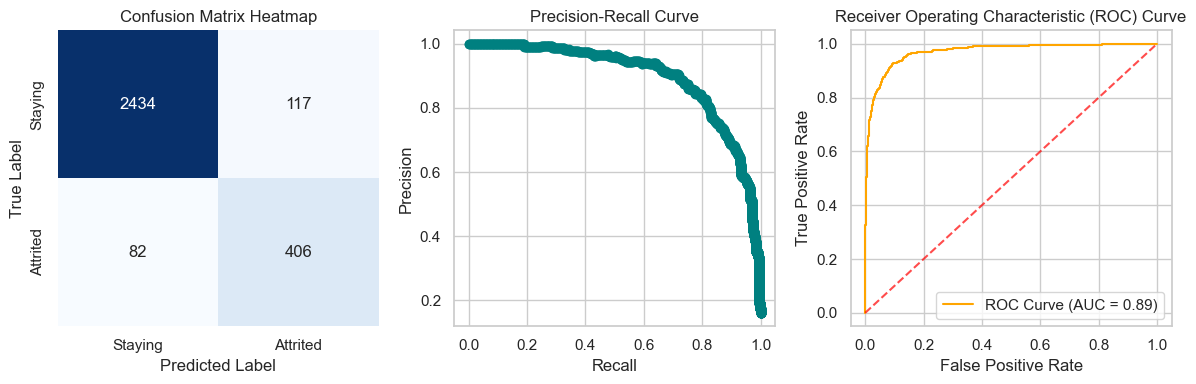

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"
4,RandomForest,"[0.93, 0.86]","[0.98, 0.64]","[0.96, 0.74]","[1.0, 1.0]","[1.0, 0.99]","[1.0, 0.99]"
5,RandomForestGS,"[0.95, 0.8]","[0.96, 0.74]","[0.96, 0.77]","[1.0, 0.91]","[0.98, 0.99]","[0.99, 0.95]"
6,XGBoost,"[0.96, 0.85]","[0.97, 0.77]","[0.97, 0.81]","[1.0, 0.99]","[1.0, 0.99]","[1.0, 0.99]"
7,XGBoostRS,"[0.97, 0.78]","[0.95, 0.83]","[0.96, 0.8]","[1.0, 0.9]","[0.98, 1.0]","[0.99, 0.95]"


In [21]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],                 # Number of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [None, 3, 5, 7, 10],                    # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],                       # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.2, 0.6, 0.8, 1.0],                   # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],                 # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3, 0.5]                          # Minimum loss reduction required to make a further partition on a leaf node
}

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=1234, scale_pos_weight=scale_pos_weight, eval_metric='logloss')

# Set up the RandomizedSearchCV
random_search = model_selection.RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,n_iter=50, scoring='f1', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

#  Get the best parameters and best estimator
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")
#-------------------------------------------------------
# Make predictions on the train set using the best model
y_trainPred_xgbhp_best = best_xgb_model.predict(X_train)

print("*****Classification Report and Plots for Test Dataset*****")

#Calculate Scores and Classification Report for test dataset
Calculate_scores('XGBoostRS',y_train,y_trainPred_xgbhp_best,False)

#Plot for test dataset
Plot_Reports(best_xgb_model,X_train,y_train,y_trainPred_xgbhp_best)
#-------------------------------------------------------

# Make predictions on the test set using the best model
y_testPred_xgbhp_best = best_xgb_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")

#Calculate Scores and Classification Report for test dataset
Calculate_scores('XGBoostRS',y_test,y_testPred_xgbhp_best,True)

#Plot for test dataset
Plot_Reports(best_xgb_model,X_test,y_test,y_testPred_xgbhp_best)
#-------------------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')

##### Observations:

Logistic Regression has good precision on the first class (0.94 on both train and test), but struggles with recall for the second class (test recall 0.38). This suggests that the model might not be detecting the second class well.

Logistic Regression with Threshold Adjustment (LogisticRegThreshold) improves recall for the second class, leading to a better balance between precision and recall.

SMOTE (Synthetic Minority Over-sampling Technique) in Logistic Regression (LogisticRegressionSMOTE) helps in dealing with class imbalance, but its performance in terms of precision for the second class (0.38) remains similar to basic Logistic Regression.

Logistic Regression with PCA reduces the dimensionality of the data. Although it performs well in training, it has lower performance on the test set (precision 0.93, recall 0.75) compared to some of the other models.

Random Forest and XGBoost models show the best performance overall, especially in terms of precision, recall, and F1-score. The Random Forest has perfect precision and recall on the training set, indicating no overfitting, and it still performs well on the test set.

XGBoost performs excellently with a high F1-score of 0.97 on the test set and retains high precision and recall, showing great generalization capability.

#### Best Performing Models:

XGBoost: The model shows high performance on both the training and test datasets, with precision and recall above 0.95 for both classes. It provides a balanced approach with high F1-scores.

Random Forest: Also provides very good performance with precision and recall both equal to 1.0 on the training set. It performs well on the test set, but slightly lower than XGBoost.

#### Considerations:

Overfitting: Need to watch out for models that overfit (like RandomForest). The training scores of 1.0 suggest that it may memorize the training data.

#### Conclusion:

For best overall performance, XGBoost seems to be the most balanced model with high precision, recall, and F1-score across both train and test sets.

for class imbalance, Logistic Regression with Threshold Adjustment or Logistic Regression SMOTE may help, but models like Random Forest and XGBoost generally outperform these in terms of overall performance.

#### Improvements

PCA is lowering the performance, so feature selection techniques like Recursive Feature Elimination (RFE) or Lasso Regression to identify the most important features can be tried.

Hyperparameter Tuning: Grid Search or Randomized Search can be used to find the optimal hyperparameters for the models. For models like Random Forest, XGBoost, or Logistic Regression, tweaking parameters such as max_depth, learning_rate, n_estimators, and others can improve performance

Cross-validation helps to ensure that the model is not overfitting to the training data and generalizes well to unseen data. Use k-fold cross-validation to get a better estimate of the model's performance.

Ensemble methods like Voting Classifier, Stacking, or Boosting (e.g., ADABoost) combine multiple models to improve the overall prediction. Sometimes, combining models like Logistic Regression and Random Forest into a voting classifier can improve results.

#### Voting Classifier

*****Classification Report and Plots for Train Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5949
           1       0.99      0.73      0.84      1139

    accuracy                           0.96      7088
   macro avg       0.97      0.86      0.91      7088
weighted avg       0.96      0.96      0.95      7088

[[5941    8]
 [ 309  830]]


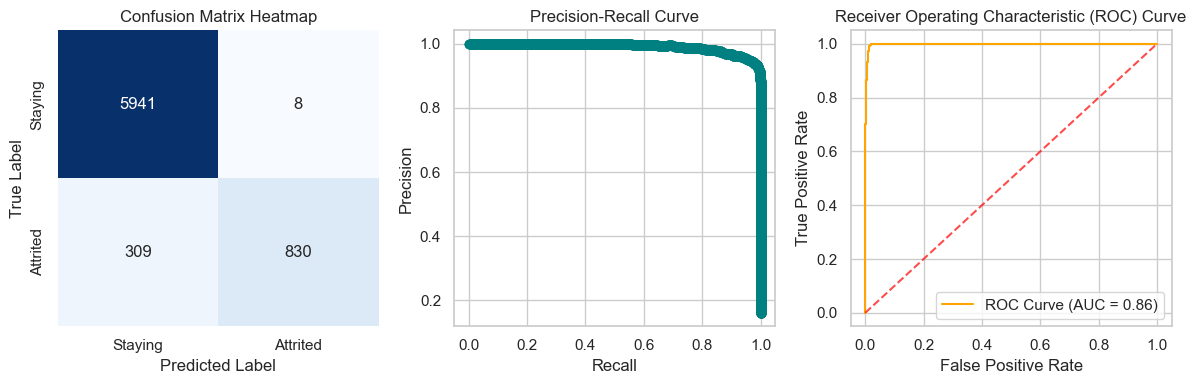

*****Classification Report and Plots for Test Dataset*****

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2551
           1       0.90      0.54      0.68       488

    accuracy                           0.92      3039
   macro avg       0.91      0.76      0.81      3039
weighted avg       0.92      0.92      0.91      3039

[[2522   29]
 [ 224  264]]


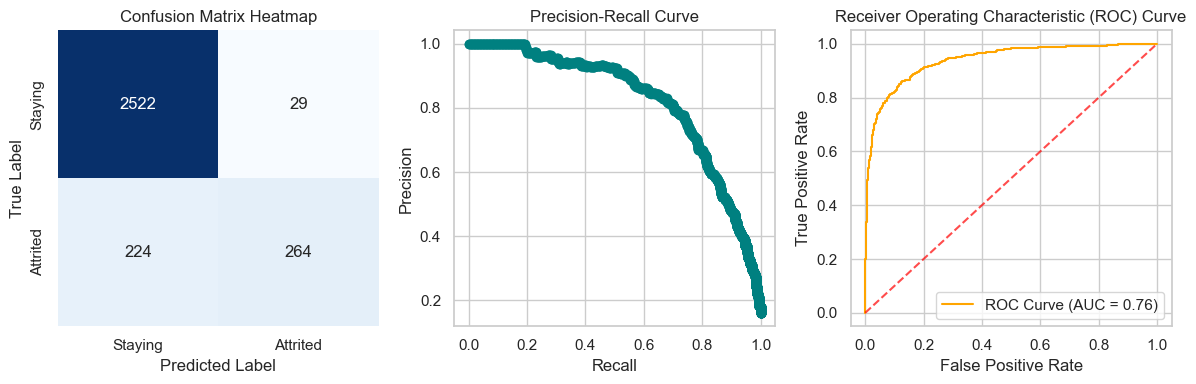

,Model,Precision_test,Recall_test,f1_test,Precision_train,Recall_train,f1_train
0,LogisticRegression,"[0.94, 0.38]","[0.77, 0.74]","[0.85, 0.5]","[0.94, 0.38]","[0.76, 0.75]","[0.84, 0.5]"
1,LogisticRegThreshold,"[0.93, 0.45]","[0.84, 0.68]","[0.88, 0.54]","[0.92, 0.54]","[0.9, 0.58]","[0.91, 0.56]"
2,LogisticRegressionSMOTE,"[0.94, 0.38]","[0.78, 0.73]","[0.85, 0.5]","[0.76, 0.77]","[0.77, 0.76]","[0.77, 0.76]"
3,LogisticRegressionPCA,"[0.93, 0.35]","[0.75, 0.73]","[0.83, 0.48]","[0.93, 0.35]","[0.74, 0.73]","[0.83, 0.48]"
4,RandomForest,"[0.93, 0.86]","[0.98, 0.64]","[0.96, 0.74]","[1.0, 1.0]","[1.0, 0.99]","[1.0, 0.99]"
5,RandomForestGS,"[0.95, 0.8]","[0.96, 0.74]","[0.96, 0.77]","[1.0, 0.91]","[0.98, 0.99]","[0.99, 0.95]"
6,XGBoost,"[0.96, 0.85]","[0.97, 0.77]","[0.97, 0.81]","[1.0, 0.99]","[1.0, 0.99]","[1.0, 0.99]"
7,XGBoostRS,"[0.97, 0.78]","[0.95, 0.83]","[0.96, 0.8]","[1.0, 0.9]","[0.98, 1.0]","[0.99, 0.95]"
8,VotingModel,"[0.92, 0.9]","[0.99, 0.54]","[0.95, 0.68]","[0.95, 0.99]","[1.0, 0.73]","[0.97, 0.84]"


In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model1 = LogisticRegression()
model2 = RandomForestClassifier()

voting_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='soft')
voting_model.fit(X_train, y_train)
#---------------------------------------------
# Make predictions on Train set using the default threshold (0.5)
y_trainpred_lg = voting_model.predict(X_train)

print("*****Classification Report and Plots for Train Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('VotingModel',y_train,y_trainpred_lg,False)
print(confusion_matrix(y_train,y_trainpred_lg))
#Plot Reports
Plot_Reports(voting_model,X_train,y_train,y_trainpred_lg)
#---------------------------------------------
# Make predictions on Test set using the default threshold (0.5)
y_testpred_lg = voting_model.predict(X_test)

print("*****Classification Report and Plots for Test Dataset*****")
#Calculate Scores and Classification Report
Calculate_scores('VotingModel',y_test,y_testpred_lg,True)
print(confusion_matrix(y_test,y_testpred_lg))
#Plot Reports
Plot_Reports(voting_model,X_test,y_test,y_testpred_lg)
#---------------------------------------------
# Show scores
pd.merge(pd.DataFrame(precision_recall_test), pd.DataFrame(precision_recall_train), how='left', on='Model')